# Q1: Grover's Algorithm

In this problem, you'll implement Grover's algorithm from scratch in `qiskit`.
In particular, we will be searching for 3-bit strings with exactly one "1."

## Part A: Introducing the CCZ gate
The `qiskit` circuit library includes a gate called the [CCZ gate](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.library.CCZGate). How does the CCZ gate transform computational basis states? Is there a geometric interpretation of this operator?

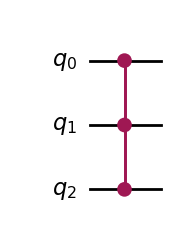

In [ ]:
# Here's an example of applying a CCZ gate (you don't have to do anything in this cell)
from qiskit import QuantumCircuit
qc = QuantumCircuit(3)
qc.ccz(0,1,2)
qc.draw(output='mpl')

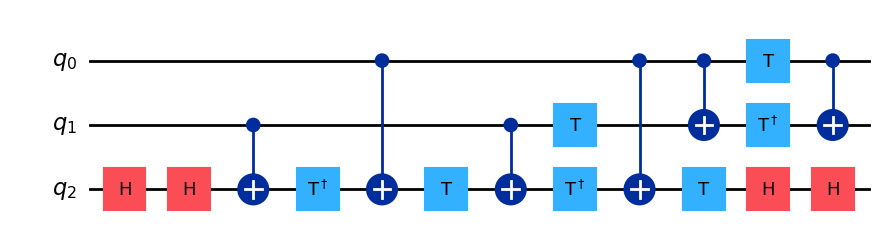

In [ ]:
# In case you're curious, here's how we can compile the ccz gate into single qubit and two-qubit gates (you don't have to do anything in this cell)
from qiskit import QuantumCircuit
from qiskit.transpiler import PassManager
from qiskit.transpiler.passes import BasisTranslator
from qiskit.circuit.equivalence_library import StandardEquivalenceLibrary as sel
qc = QuantumCircuit(3)
qc.ccz(0,1,2)
pm = PassManager(
            [BasisTranslator(equivalence_library=sel, target_basis=["t", "tdg", "h", "x", "cx"])]
        )
transpiled_circuit = pm.run(qc)
transpiled_circuit.draw(output='mpl')

# Part A Solution (TODO)

CCZ gate flip the phase of the current state if all the bit in the bitstring is '1'.

![](https://learning-api.quantum.ibm.com/assets/c6e82dd7-81c9-4078-a952-139c8c5aabca?format=auto&quality=80)

Geometrically, this operation can be represent in the following image which $|A_1\rangle$ is $|111\rangle$ and $|A_0\rangle$ is unitary superposition of all other bitstrings.

## Part B: Defining the Grover Oracle

Consider the following function:

$$f(x) = 	 \begin{cases}
  1  & x \text{ contains exactly one 1} \\
  0 & \text{otherwise}
\end{cases}
$$

For example, $f(001) = 1$, but $f(110) = f(000) =  0.$

Based on the discussion from class, implement an oracle operator for $f$.
Recall that the  oracle $U$ should have the following behavior on computational basis states:

$$U|x\rangle =	 \begin{cases}
  |x\rangle & f(x)=0\\
  -|x\rangle & f(x)=1\\
\end{cases}
$$

Fill in the function `grover_oracle` below to return the desired circuit.

Your oracle operator should act on three qubit, with no additional ancilla qubits.

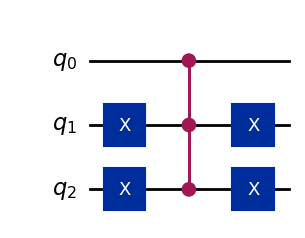

In [ ]:
from qiskit import QuantumCircuit
def grover_oracle():
  # Fill in the oracle operator here
  circ = QuantumCircuit(3)
  circ.x(1)
  circ.x(2)
  circ.ccz(0, 1, 2)
  circ.x(1)
  circ.x(2)
  return circ

grover_oracle().draw('mpl')

## Part C: Defining the Diffusion Operator
Fill in the function `grover_diffusion_operator` below to return the Grover diffusion ("inversion about the mean") operator over three qubits:

$$D = \mathbb{I} - 2|s⟩⟨s|$$


*Hint: Remember that we can think about this operator in three parts: rotate the equal superposition to $|000\rangle$, reflect about $|000\rangle$, then undo the initial rotation.*

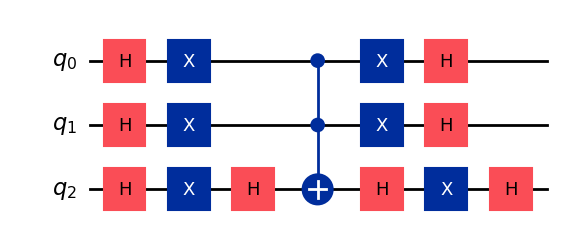

In [ ]:
from qiskit import QuantumCircuit
def grover_diffusion_operator():
  # Fill in the diffusion operator here
  circ = QuantumCircuit(3)
  circ.h([0, 1, 2])
  circ.x([0, 1, 2])
  circ.h(2)
  circ.ccx(0, 1, 2)
  circ.h(2)
  circ.x([0, 1, 2])
  circ.h([0, 1, 2])
  return circ

grover_diffusion_operator().draw('mpl')

# Part D: Simulating the search
The function `grover_circuit` below can be used to build a circuit that performs a given number of iterations of Grover's algorithm (assuming you've implemented the two functions above!). We'll use it to simulate the search.

Theoretical analysis tells us that the optimal number of iterations of Grover's algorithm is approximately
$$
\lceil \frac{\pi}{4} \sqrt{\frac{N}{M}} \rceil
$$

where N is the number of marked states and M is the total number of states.

Construct the circuit for $k-1, k,$ and $k+1$ iterations where
$
k = \lceil \frac{\pi}{4} \sqrt{\frac{N}{M}} \rceil
$, and simulate each circuit for 1024 shots.

Plot a histogram of measurement outcomes for each.

 Which gives you the highest probability of success?

In [ ]:
# You don't have to do anything in this cell
from qiskit import QuantumCircuit
def grover_circuit(iterations=1):
  qc = QuantumCircuit(3)
  qc.h(range(3))
  for iters in range(iterations):
    qc.compose(grover_oracle(), inplace=True)
    qc.compose(grover_diffusion_operator(), inplace=True)
  qc.measure_all()
  return qc

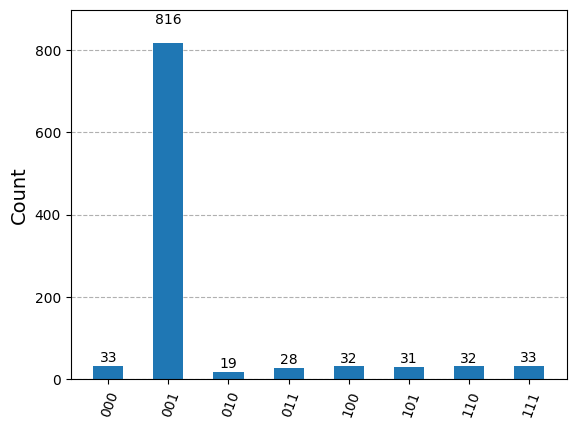

In [ ]:
# Add your simulation code here
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import math
simulator = AerSimulator()
results = simulator.run(grover_circuit( math.ceil(math.pi / 4 * math.sqrt(1 / 2**3))), shot=1024).result()
plot_histogram(results.get_counts())

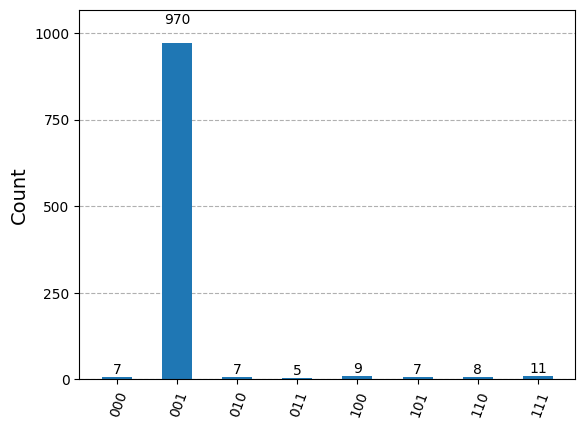

In [ ]:
results = simulator.run(grover_circuit( math.ceil(math.pi / 4 * math.sqrt(1 / 2**3)) + 1), shot=1024).result()
plot_histogram(results.get_counts())

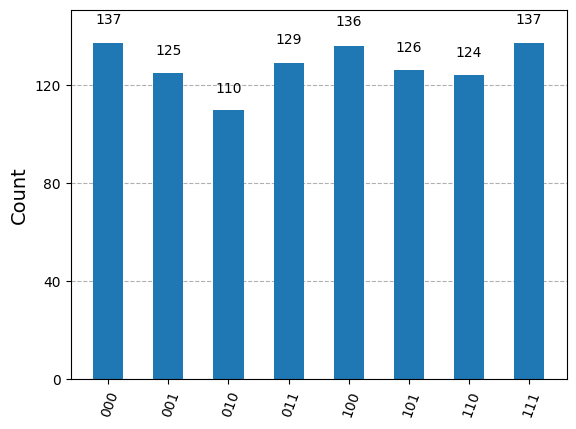

In [ ]:
results = simulator.run(grover_circuit( math.ceil(math.pi / 4 * math.sqrt(1 / 2**3))-1), shot=1024).result()
plot_histogram(results.get_counts())

## Part D Response (TODO)

Based on the result of simulation, $K$ iterations get a relative nice result,
$K + 1$ iterations get the best result. But $K - 1$ iterations' result cannot be used at all.